In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("data.csv")
df=data.copy()

In [3]:
df.shape

(6819, 96)

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<AxesSubplot:>

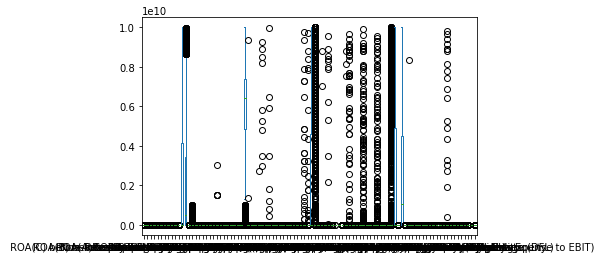

In [5]:
df.plot(kind="box")

In [6]:
df.isnull().sum().sum()

0

In [7]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [8]:
X=df.drop("Bankrupt?",axis=1)
y=df["Bankrupt?"]

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
# a=pd.DataFrame(RobustScaler().fit_transform(a),columns=X_res.columns).abs()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
regression=LogisticRegression()

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [29]:
X_resampled.shape

(13198, 95)

In [30]:
a=[]
def remove_outlier(df_in, col_name):
    data=df_in[col_name]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 
    lwr_bound  = q1-1.5*IQR
    upr_bound= q3+1.5*IQR
    df_out = np.clip(data, lwr_bound, upr_bound)
    return df_out
for i in X_resampled.columns:
    a.append(remove_outlier(X_resampled, i))
a=np.array(a)
a=pd.DataFrame(a.reshape(95,13198), X_resampled.columns)
a=pd.DataFrame(np.array(a).T,columns=X_res.columns)

In [31]:
a

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.322381,0.333788,0.363195,0.578219,0.578483,0.998581,0.796541,0.808527,0.302901,0.780747,...,0.671366,0.000000,0.622058,0.578213,0.827605,0.265535,0.026281,0.562710,1.0,0.000000
1,0.322381,0.333788,0.363195,0.578219,0.578483,0.998581,0.796541,0.808527,0.302901,0.780747,...,0.671366,0.000102,0.622058,0.578213,0.827605,0.265535,0.026281,0.562710,1.0,0.003946
2,0.322381,0.333788,0.363195,0.578219,0.578483,0.998581,0.796541,0.808527,0.302901,0.780747,...,0.671366,0.000104,0.622058,0.578213,0.827605,0.265535,0.026281,0.562710,1.0,0.003946
3,0.322381,0.333788,0.363195,0.578219,0.578483,0.998581,0.796541,0.808527,0.302901,0.780747,...,0.671366,0.000107,0.622058,0.578213,0.827605,0.265535,0.026281,0.562710,1.0,0.003946
4,0.322381,0.333788,0.363195,0.578219,0.578483,0.998581,0.796541,0.808527,0.302901,0.780747,...,0.671366,0.000108,0.622058,0.578213,0.827605,0.265535,0.026281,0.562710,1.0,0.003946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.616731,0.703173,0.673865,0.628638,0.628491,0.999322,0.798044,0.809909,0.303921,0.782188,...,0.897403,0.015644,0.625291,0.628642,0.849821,0.299160,0.027235,0.567459,1.0,0.065177
13194,0.616731,0.703173,0.673865,0.628638,0.628491,0.999322,0.798044,0.809909,0.303921,0.782188,...,0.897403,0.015644,0.625291,0.628642,0.849821,0.299160,0.027235,0.567459,1.0,0.065177
13195,0.616731,0.703173,0.673865,0.628638,0.628491,0.999322,0.798044,0.809909,0.303921,0.782188,...,0.897403,0.015644,0.625291,0.628642,0.849821,0.299160,0.027235,0.567459,1.0,0.065177
13196,0.616731,0.703173,0.673865,0.628638,0.628491,0.999322,0.798044,0.809909,0.303921,0.782188,...,0.897403,0.015644,0.625291,0.628642,0.849821,0.299160,0.027235,0.567459,1.0,0.065177


In [41]:
b=pd.DataFrame(StandardScaler().fit_transform(X_resampled),columns=X_res.columns).abs()

In [42]:
X_train, X_test, y_train, y_test = train_test_split (b, y_resampled, test_size = 0.2, random_state = 0)

In [43]:
regression.fit(X_train, y_train)

C:\Users\elnur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
regression.score(X_train,y_train)

0.7851865883690092

In [45]:
regression.score(X_test,y_test)

0.7988636363636363

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [47]:
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train,y_train)

In [48]:
clf.score(X_train,y_train)

0.9072741049441182

In [49]:
clf.score(X_test,y_test)

0.9159090909090909

In [50]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
y_pred=clf.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1269
           1       0.90      0.94      0.92      1371

    accuracy                           0.92      2640
   macro avg       0.92      0.91      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Confusion matrix

 [[1126  143]
 [  79 1292]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred=gbc.predict(X_test)

In [ ]:
gbc.score(X_train, y_train)

0.9849403296078802

In [ ]:
gbc.score(X_test, y_test)

0.9837121212121213

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1269
           1       1.00      0.97      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Confusion matrix

 [[1269    0]
 [  43 1328]]


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=[(X_test, y_test)])

C:\Users\elnur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\elnur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.45207
[1]	validation_0-logloss:0.32040
[2]	validation_0-logloss:0.23718
[3]	validation_0-logloss:0.18249
[4]	validation_0-logloss:0.14612
[5]	validation_0-logloss:0.12088
[6]	validation_0-logloss:0.10359
[7]	validation_0-logloss:0.09000
[8]	validation_0-logloss:0.08166
[9]	validation_0-logloss:0.07543
[10]	validation_0-logloss:0.07121
[11]	validation_0-logloss:0.06840
[12]	validation_0-logloss:0.06654
[13]	validation_0-logloss:0.06517
[14]	validation_0-logloss:0.06404
[15]	validation_0-logloss:0.06378
[16]	validation_0-logloss:0.06309
[17]	validation_0-logloss:0.06305
[18]	validation_0-logloss:0.06260
[19]	validation_0-logloss:0.06234
[20]	validation_0-logloss:0.06215
[21]	validation_0-logloss:0.06208
[22]	validation_0-logloss:0.06201
[23]	validation_0-logloss:0.06206
[24]	validation_0-logloss:0.06206
[25]	validation_0-logloss:0.06180
[26]	validation_0-logloss:0.06175
[27]	validation_0-logloss:0.06175
[28]	validation_0-logloss:0.06172
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred=xgb_model.predict(X_test)

In [ ]:
xgb_model.score(X_train, y_train)

0.9907179390035992

In [ ]:
xgb_model.score(X_test, y_test)

0.9871212121212121

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1269
           1       1.00      0.98      0.99      1371

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

Confusion matrix

 [[1266    3]
 [  31 1340]]


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.991759802992991

In [ ]:
model.score(X_test, y_test)

0.9878787878787879

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1269
           1       1.00      0.98      0.99      1371

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

Confusion matrix

 [[1265    4]
 [  28 1343]]


In [ ]:
from catboost import CatBoostClassifier

ctb = CatBoostClassifier(iterations=2, learning_rate=1, depth=2)

In [ ]:
ctb.fit(X_train, y_train)

0:	learn: 0.0775959	total: 167ms	remaining: 167ms
1:	learn: 0.0756660	total: 169ms	remaining: 0us


In [ ]:
y_pred=ctb.predict(X_test)

In [ ]:
ctb.score(X_train, y_train)

0.9823830270884637

In [ ]:
ctb.score(X_test, y_test)

0.9829545454545454

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1269
           1       1.00      0.97      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Confusion matrix

 [[1268    1]
 [  44 1327]]
